Upper Confidence Bound (UCB)
============================

El problema del bandido multi brazo es un problema de optimización que se puede plantear de la siguiente manera: tenemos $k$ tragaperras, cada una con una distribución de probabilidad asociada. El objetivo es maximizar la recompensa total obtenida al jugar el juego durante un tiempo $T$. En cada paso $t$ se elige una tragaperras y se obtiene una recompensa $X_t$ que se asume que proviene de una distribución de probabilidad $p_t$ asociada a la tragaperras elegida.
El algoritmo es el siguiente:

1.- A cada tiempo $t$ se consideran dos números $N_i(t)$ (el número de veces que se seleccionó la tragaperras $i$) y $R_i(t)$ (la suma de las recompensas).
2.- Se calcula la recompensa media de cada tragaperras $i$ como $\hat{r}_i(t) = \frac{R_i(t)}{N_i(t)}$ y el intervalo de confianza $(\hat{r}_i(t) - \Delta_i(t), \hat{r}_i(t) + \Delta_i(t))$ con $\Delta_i(t) = \sqrt{\frac{3\log(t)}{2N_i(t)}}$.
3.- Se selecciona la tragaperras $i$ con mayor límite superior del intervalo de confianza, es decir, $i = \arg\max_i(\hat{r}_i(t) + \Delta_i(t))$.

<center>

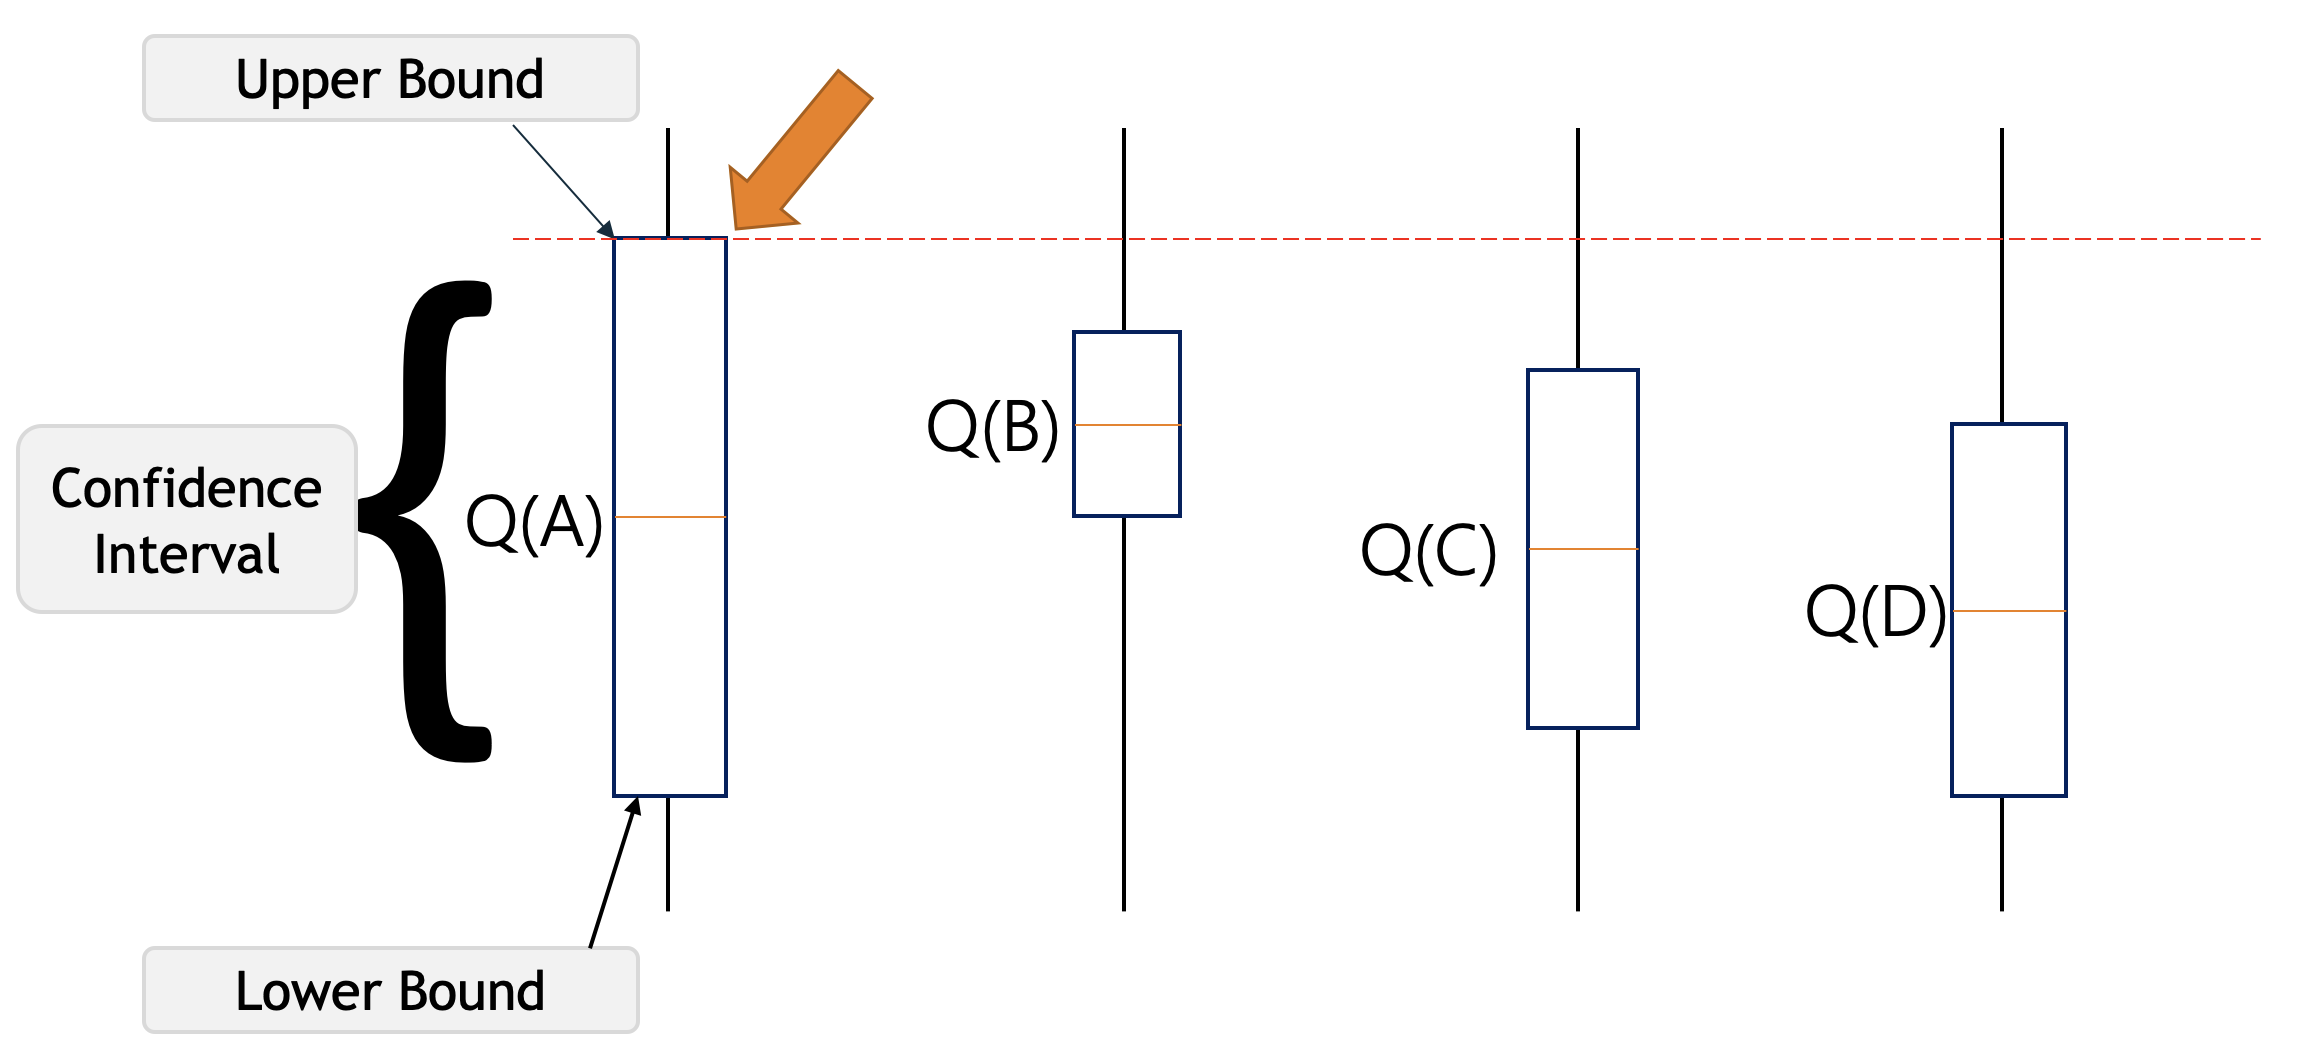

</center>

In [4]:
import numpy as numpy
import matplotlib.pyplot as plt
import pandas as pd
import math

# Importamos el dataset
dataset = pd.read_csv('./datasets/Ads_CTR_Optimisation.csv')

# Implementar UCB
d = 10
N = 10000
number_of_selections = [0] * d
sums_of_rewards = [0] * d
ads_selected = []
total_reward = 0

for n in range(0, N): 

    max_upper_bound = 0
    ad = 0

    for i in range(0, d):

        if number_of_selections[i] > 0:
            average_reward = sums_of_rewards[i] / number_of_selections[i]
            delta_i = math.sqrt((3 * math.log(n + 1)) / (2 * number_of_selections[i]))
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400

        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i

    ads_selected.append(ad)
    number_of_selections[ad] += 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] += int(reward)
    total_reward += int(reward)

print('Total reward: ' + str(total_reward))

Total reward: 2178


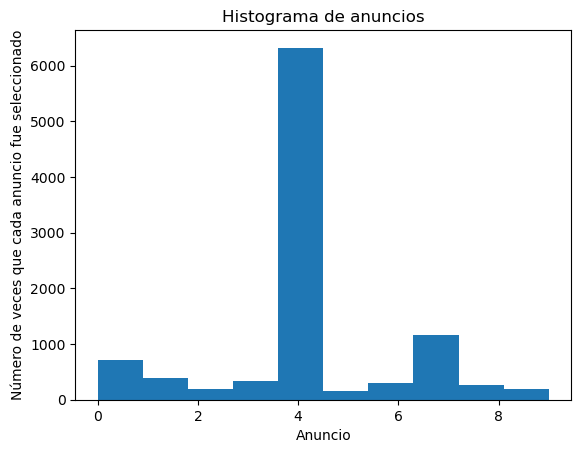

In [3]:
# Visualizar los resultados
plt.hist(ads_selected)
plt.title('Histograma de anuncios')
plt.xlabel('Anuncio')
plt.ylabel('Número de veces que cada anuncio fue seleccionado')
plt.show()